In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/combined_data_ENGHIN.csv')

In [5]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df.dropna(inplace = True)

In [7]:
df['text'].fillna('', inplace=True)

In [8]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [9]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [10]:
x = df['text']
y = df['label']

In [11]:
from sklearn.model_selection import train_test_split

# Define the proportions for train, validation, and test sets
train_size = 0.7  # 70% of the data for training
validation_size = 0.15  # 15% for validation
test_size = 0.15  # 15% for testing

# First, split the data into training and the rest
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=1 - train_size, random_state=42)

# Next, split the remaining data into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_size / (test_size + validation_size), random_state=42)

# The data is now split into X_train, y_train (training), X_val, y_val (validation), and X_test, y_test (test)


In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer =Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(x_train)

In [14]:
x_train_after = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 2400)
x_val_after = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen = 2400)
x_test_after = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 2400)

In [15]:
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from keras.models import Sequential

In [16]:
model = Sequential([
    Embedding(input_dim = 20000, output_dim = 200, input_length = 2400),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences = True)),
    Bidirectional(LSTM(64, return_sequences = True)),
    GlobalMaxPooling1D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2400, 200)         4000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 2400, 200)         0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 2400, 256)         336896    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 2400, 128)         164352    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                        

In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
history = model.fit(x_train_after, y_train, batch_size = 50, epochs = 11, validation_data = (x_val_after, y_val))

Epoch 1/11
1033/1033 [==============================] - 559s 526ms/step - loss: 0.1126 - accuracy: 0.9501 - val_loss: 0.0643 - val_accuracy: 0.9761
Epoch 2/11
1033/1033 [==============================] - 463s 448ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0601 - val_accuracy: 0.9797
Epoch 3/11
1033/1033 [==============================] - 440s 426ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0606 - val_accuracy: 0.9808
Epoch 4/11
1033/1033 [==============================] - 422s 408ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0644 - val_accuracy: 0.9820
Epoch 5/11
1033/1033 [==============================] - 417s 403ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0615 - val_accuracy: 0.9825
Epoch 6/11
1033/1033 [==============================] - 414s 400ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0782 - val_accuracy: 0.9822
Epoch 7/11
1033/1033 [==============================] - 395s 382ms/step - loss: 0.0061 - accuracy: 0.9978 - val_

In [21]:
from keras.models import save_model
save_model(model, 'my_lstmFake_model_intern_2401.h5')

<ipython-input-21-de9918da5a76>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'my_lstmFake_model_intern_2401.h5')


In [22]:
import pickle

with open('history_2401.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [23]:
"""from keras.models import load_model
model = load_model('my_lstmFake_model_intern_2401.h5')"""

"from keras.models import load_model\nmodel = load_model('my_lstmFake_model_intern_2401.h5')"

In [24]:
test_loss, test_accuracy = model.evaluate(x_test_after, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


346/346 [==============================] - 42s 120ms/step - loss: 0.0864 - accuracy: 0.9811
Test Loss: 0.08636623620986938
Test Accuracy: 0.9811150431632996


In [25]:
predictions = model.predict(x_test_after)


346/346 [==============================] - 41s 115ms/step


In [26]:
import matplotlib.pyplot as plt

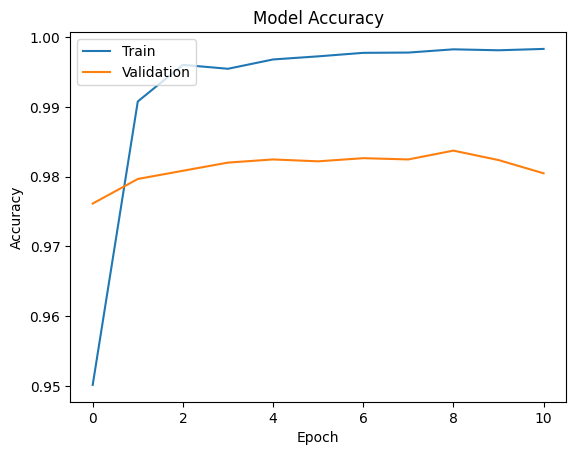

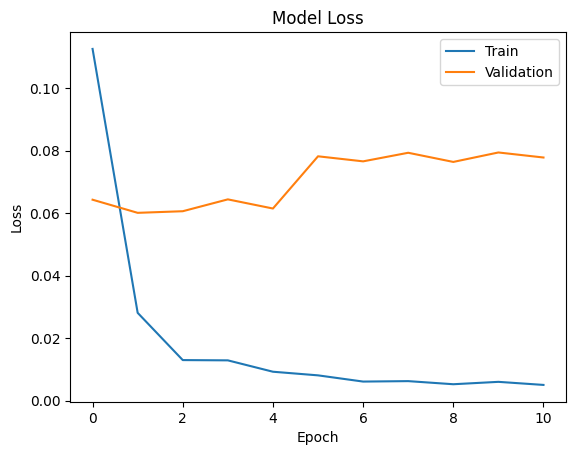

In [27]:
try:
    with open('history_2401.pkl', 'rb') as file:
        training_history = pickle.load(file)

    # Plot the accuracy curve
    plt.plot(training_history['accuracy'])
    plt.plot(training_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot the loss curve
    plt.plot(training_history['loss'])
    plt.plot(training_history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

except FileNotFoundError:
    print("Training history file not found. Make sure you saved it during training.")

In [28]:
from google.colab import files
files.download('history_2401.pkl')
files.download('my_lstmFake_model_intern_2401.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
predictions

array([[9.9999714e-01],
       [4.4269111e-10],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3329568e-06]], dtype=float32)

In [30]:
threshold = 0.5
lstm_binary_predictions = (predictions >= threshold).astype(int)

In [31]:
lstm_binary_predictions

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [33]:
accuracy = accuracy_score(y_test, lstm_binary_predictions)

In [34]:
recall = recall_score(y_test, lstm_binary_predictions)
precision = precision_score(y_test, lstm_binary_predictions)
f1Score = f1_score(y_test, lstm_binary_predictions)

In [35]:
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1Score)

Accuracy:  0.9811150266558236
Precision: 0.9758308157099698
Recall: 0.9868799424874192
F1 Score: 0.9813242784380306


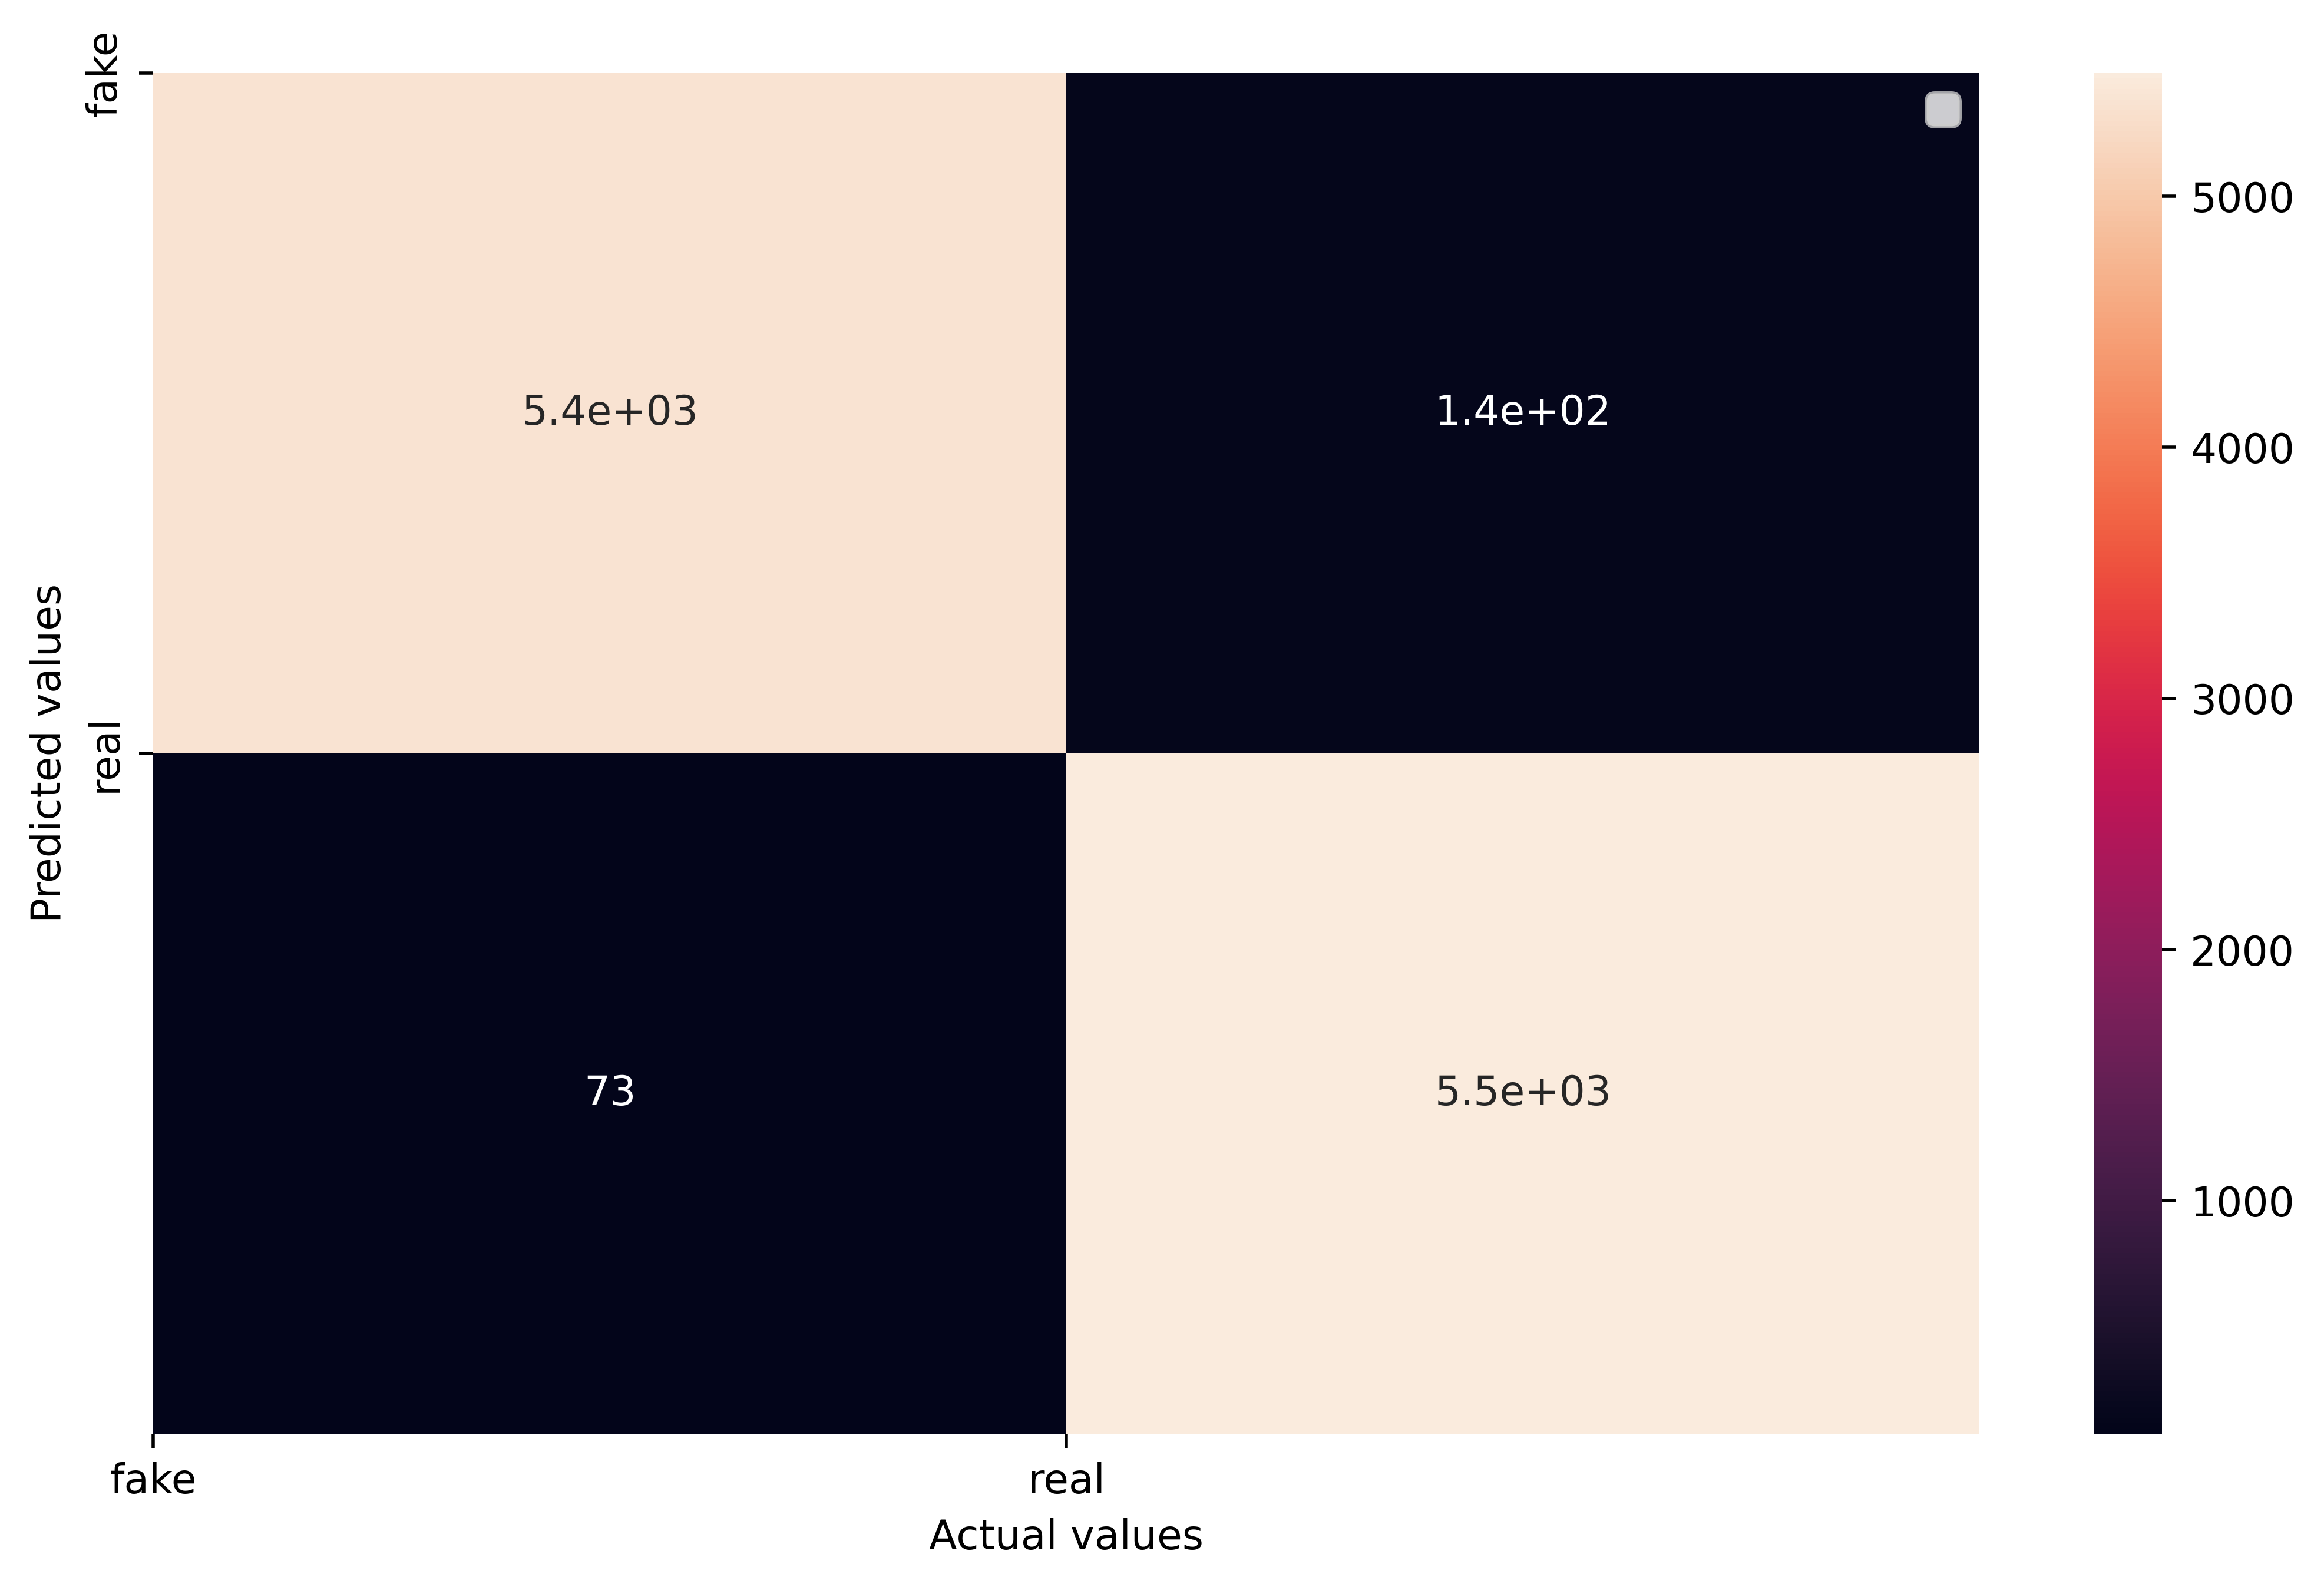

In [36]:
import seaborn as sns
cm_rf = confusion_matrix(y_test, lstm_binary_predictions)
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm_rf, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

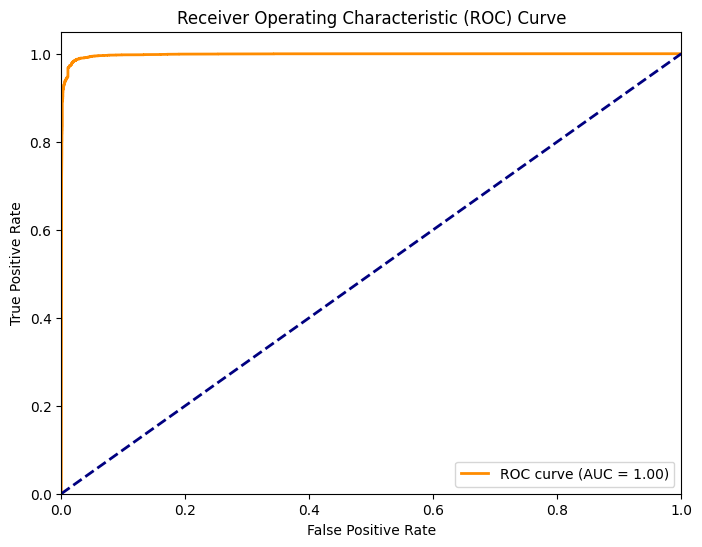

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
